In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
# Compute cost function
def compute_cost(X, y, w, b):
    m = len(y)
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    
    # Clipping to avoid log(0)
    y_hat = np.clip(y_hat, 1e-10, 1 - 1e-10)
    
    # Logistic cost function
    cost = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return cost

In [7]:
# Compute gradients
def compute_gradient(X, y, w, b):
    m = len(y)
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    
    # Gradients
    dw = np.dot(X.T, (y_hat - y)) / m
    db = np.sum(y_hat - y) / m
    
    return dw, db

In [9]:
# Gradient Descent
def gradient_descent(X, y, w, b, alpha, iterations):
    cost_history = []

    for i in range(iterations):
        dw, db = compute_gradient(X, y, w, b)
        
        # Update parameters
        w -= alpha * dw
        b -= alpha * db
        
        # Compute cost
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return w, b, cost_history


In [11]:
# Generate synthetic data
np.random.seed(0)
m = 100  # Number of examples
X = np.random.rand(m, 1) * 10  # Features
y = (X > 5).astype(int).flatten()  # Labels (Binary classification)

In [19]:
# Initialize parameters
w = np.zeros((X.shape[1],))
b = 0

# Run gradient descent
alpha = 0.1
iterations = 1000
w_opt, b_opt, cost_history = gradient_descent(X, y, w, b, alpha, iterations)

Iteration 0: Cost = 0.6024962853708339
Iteration 100: Cost = 0.3649472169271529
Iteration 200: Cost = 0.27806930283988407
Iteration 300: Cost = 0.2335471941103955
Iteration 400: Cost = 0.20605075745906057
Iteration 500: Cost = 0.1870543995158993
Iteration 600: Cost = 0.17294316494298273
Iteration 700: Cost = 0.16192244446528353
Iteration 800: Cost = 0.15299653211189185
Iteration 900: Cost = 0.1455658400204239


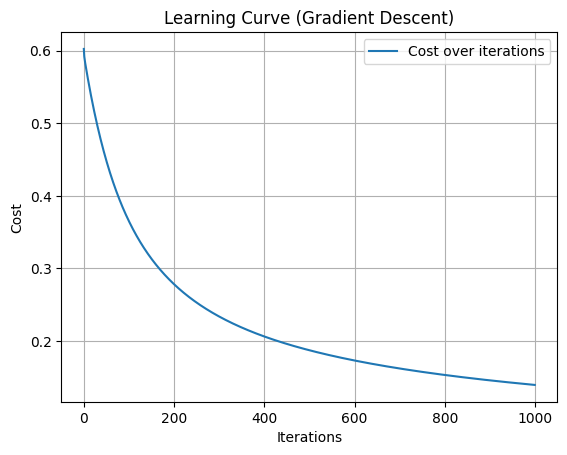

In [21]:
# Plot cost function over iterations
plt.plot(range(iterations), cost_history, label="Cost over iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Learning Curve (Gradient Descent)")
plt.legend()
plt.grid(True)
plt.show()